In [2]:
# 使下面的代码支持python2和python3
from __future__ import division, print_function, unicode_literals

# 查看python的版本是否为3.5及以上
import sys
assert sys.version_info >= (3, 5)

# 查看sklearn的版本是否为0.20及以上
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os 

# 在每一次的运行后获得的结果与这个notebook的结果相同
np.random.seed(42) 

# 让matplotlib的图效果更好
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 设置保存图片的途径
PROJECT_ROOT_DIR = "."
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGE_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True):
    '''
    运行即可保存自动图片
    
    :param fig_id: 图片名称
    '''
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
# 忽略掉没用的警告 (Scipy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", category=FutureWarning, module='sklearn',  lineno=196)

In [4]:
# 读取数据集
df = pd.read_excel('data.xlsx', engine="openpyxl")
df.head()

,TRUE VALUE,SiO2 (wt. %),TiO2 (wt. %),Al2O3 (wt. %),Cr2O3 (wt. %),FeO (wt. %),MnO (wt. %),MgO (wt. %),CaO (wt. %),Na2O (wt. %),IV (Al),H2O (wt. %)
0,1,47.604,2.858,5.749,0.062,7.024,0.087,12.625,22.916,0.328,0.207900,0.061750
1,1,51.788,1.166,2.557,0.475,6.801,0.145,14.762,21.743,0.327,0.080071,0.014881
2,1,46.561,3.109,6.139,0.145,6.914,0.037,12.478,23.112,0.620,0.238984,0.023204
3,1,46.344,3.170,7.776,0.014,6.842,0.068,11.688,23.067,0.574,0.258931,0.049703
4,1,50.180,1.965,3.294,0.106,5.729,0.063,13.603,23.626,0.540,0.121500,0.019333


In [5]:
# 查看数据集是否有空值，看需不需要插值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2272 entries, 0 to 2271
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TRUE VALUE     2272 non-null   int64  
 1   SiO2 (wt. %)   2272 non-null   float64
 2   TiO2 (wt. %)   2272 non-null   float64
 3   Al2O3 (wt. %)  2272 non-null   float64
 4   Cr2O3 (wt. %)  2272 non-null   float64
 5   FeO (wt. %)    2272 non-null   float64
 6   MnO (wt. %)    2272 non-null   float64
 7   MgO (wt. %)    2272 non-null   float64
 8   CaO (wt. %)    2272 non-null   float64
 9   Na2O  (wt. %)  2272 non-null   float64
 10  IV (Al)        2272 non-null   float64
 11  H2O (wt. %)    2272 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 213.1 KB


In [6]:
'''
# 插值
df.fillna(0, inplace=True)
# 或者是参考之前在多项式回归里的插值方式
'''

'\n# 插值\ndf.fillna(0, inplace=True)\n# 或者是参考之前在多项式回归里的插值方式\n'

In [7]:
# 将真实的分类标签与特征分开
data = df.drop('TRUE VALUE', axis=1)
labels = df['TRUE VALUE'].copy()
np.unique(labels)

array([-1,  0,  1])

In [8]:
labels

0       1
1       1
2       1
3       1
4       1
       ..
2267    0
2268    0
2269    0
2270    0
2271    0
Name: TRUE VALUE, Length: 2272, dtype: int64

In [9]:
# 获取数据的数量和特征的数量
n_samples, n_features = data.shape
# 获取分类标签的数量
n_labels = len(np.unique(labels))

In [10]:
np.unique(labels)

array([-1,  0,  1])

In [11]:
labels.value_counts()

 1    1488
-1     467
 0     317
Name: TRUE VALUE, dtype: int64

# KMeans算法聚类

In [13]:
from sklearn import metrics

def get_marks(estimator, data, name=None, kmeans=None, af=None):
    """
    获取评分，有五种需要知道数据集的实际分类信息，有三种不需要，参考readme.txt
    对于Kmeans来说，一般用轮廓系数和inertia即可
    
    :param estimator: 模型
    :param name: 初始方法
    :param data: 特征数据集
    """
    estimator.fit(data)
    print(20 * '*', name, 20 * '*')
    if kmeans:
        print("Mean Inertia Score: ", estimator.inertia_)
    elif af:
        cluster_centers_indices = estimator.cluster_centers_indices_
        print("The estimated number of clusters: ", len(cluster_centers_indices))
    print("Homogeneity Score: ", metrics.homogeneity_score(labels, estimator.labels_))
    print("Completeness Score: ", metrics.completeness_score(labels, estimator.labels_))
    print("V Measure Score: ", metrics.v_measure_score(labels, estimator.labels_))
    print("Adjusted Rand Score: ", metrics.adjusted_rand_score(labels, estimator.labels_))
    print("Adjusted Mutual Info Score: ", metrics.adjusted_mutual_info_score(labels, estimator.labels_))
    print("Calinski Harabasz Score: ", metrics.calinski_harabasz_score(data, estimator.labels_))
    print("Silhouette Score: ", metrics.silhouette_score(data, estimator.labels_))

In [14]:
from sklearn.cluster import KMeans

# 使用k-means进行聚类，设置簇=2，设置不同的初始化方式（'k-means++'和'random'）
km1 = KMeans(init='k-means++', n_clusters=2, n_init=10, random_state=42)
km2 = KMeans(init='random', n_clusters=2, n_init=10, random_state=42)
print("n_labels: %d \t n_samples: %d \t n_features: %d" % (n_labels, n_samples, n_features))
get_marks(km1, data, name="k-means++", kmeans=True)
get_marks(km2, data, name="random", kmeans=True)

n_labels: 3 	 n_samples: 2272 	 n_features: 11
******************** k-means++ ********************
Mean Inertia Score:  13102.713200661237
Homogeneity Score:  0.0166831124167455
Completeness Score:  0.021889573646530595
V Measure Score:  0.018934964357972598
Adjusted Rand Score:  -0.015267604890234954
Adjusted Mutual Info Score:  0.018375099320149944
Calinski Harabasz Score:  1782.1498532401001
Silhouette Score:  0.377838713106552
******************** random ********************
Mean Inertia Score:  13102.713200661237
Homogeneity Score:  0.0166831124167455
Completeness Score:  0.021889573646530595
V Measure Score:  0.018934964357972598
Adjusted Rand Score:  -0.015267604890234954
Adjusted Mutual Info Score:  0.018375099320149944
Calinski Harabasz Score:  1782.1498532401001
Silhouette Score:  0.377838713106552


In [15]:
# 聚类后每个数据的类别
km1.labels_

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

In [16]:
# 类别的类型
np.unique(km1.labels_)

array([0, 1], dtype=int32)

In [17]:
# 将聚类的结果写入原始表格中
df['km_clustering_label'] = km1.labels_
# 以csv形式导出原始表格
#df.to_csv('result.csv')

In [18]:
# 区别于data，df是原始数据集
df.head()

,TRUE VALUE,SiO2 (wt. %),TiO2 (wt. %),Al2O3 (wt. %),Cr2O3 (wt. %),FeO (wt. %),MnO (wt. %),MgO (wt. %),CaO (wt. %),Na2O (wt. %),IV (Al),H2O (wt. %),km_clustering_label
0,1,47.604,2.858,5.749,0.062,7.024,0.087,12.625,22.916,0.328,0.207900,0.061750,0
1,1,51.788,1.166,2.557,0.475,6.801,0.145,14.762,21.743,0.327,0.080071,0.014881,1
2,1,46.561,3.109,6.139,0.145,6.914,0.037,12.478,23.112,0.620,0.238984,0.023204,0
3,1,46.344,3.170,7.776,0.014,6.842,0.068,11.688,23.067,0.574,0.258931,0.049703,0
4,1,50.180,1.965,3.294,0.106,5.729,0.063,13.603,23.626,0.540,0.121500,0.019333,0


In [19]:
from sklearn.model_selection import GridSearchCV

# 使用GridSearchCV自动寻找最优参数，kmeans在这里是作为分类模型使用，而非聚类
params = {'init':('k-means++', 'random'), 'n_clusters':[2, 3, 4, 5, 6], 'n_init':[5, 10, 15]}
cluster = KMeans(random_state=42)
# 使用调整的兰德系数(adjusted_rand_score)作为评分，具体可参考readme.txt
km_best_model = GridSearchCV(cluster, params, cv=3, scoring='adjusted_rand_score',
                             verbose=1, n_jobs=-1)
# 由于选用的是外部评价指标，因此得有原数据集的真实分类信息
km_best_model.fit(data, labels)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.3s finished


GridSearchCV(cv=3, estimator=KMeans(random_state=42), n_jobs=-1,
             param_grid={'init': ('k-means++', 'random'),
                         'n_clusters': [2, 3, 4, 5, 6], 'n_init': [5, 10, 15]},
             scoring='adjusted_rand_score', verbose=1)

In [20]:
# 最优模型的参数
km_best_model.best_params_

{'init': 'k-means++', 'n_clusters': 3, 'n_init': 5}

In [21]:
# 最优模型的评分
km_best_model.best_score_

0.037663692344207717

In [22]:
# 获得的最优模型
km3 = km_best_model.best_estimator_
km3

KMeans(n_clusters=3, n_init=5, random_state=42)

In [23]:
# 获取最优模型的8种评分，具体含义参考readme.txt
get_marks(km3, data, name="k-means++", kmeans=True)

******************** k-means++ ********************
Mean Inertia Score:  10617.459623678296
Homogeneity Score:  0.04517523511343203
Completeness Score:  0.03618016915891193
V Measure Score:  0.04018043208847294
Adjusted Rand Score:  0.04635544048189519
Adjusted Mutual Info Score:  0.03932134070144103
Calinski Harabasz Score:  1364.722000333955
Silhouette Score:  0.2898868570766755


In [24]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from matplotlib import pyplot as plt

def plot_scores(init, max_k, data, labels):
    '''画出kmeans不同初始化方法的三种评分图
    
    :param init: 初始化方法,有'k-means++'和'random'两种
    :param max_k: 最大的簇中心数目
    :param data: 特征的数据集
    :param labels: 真实标签的数据集
    '''
    
    i = []
    inertia_scores = []
    y_silhouette_scores = []
    y_calinski_harabaz_scores = []
    
    for k in range(2, max_k):
        kmeans_model = KMeans(n_clusters=k, random_state=1, init=init, n_init=10)
        pred = kmeans_model.fit_predict(data)
        i.append(k)
        inertia_scores.append(kmeans_model.inertia_)
        y_silhouette_scores.append(silhouette_score(data, pred))
        y_calinski_harabaz_scores.append(calinski_harabasz_score(data, pred))
    
    new = [inertia_scores, y_silhouette_scores, y_calinski_harabaz_scores]
    for j in range(len(new)):
        plt.figure(j+1)
        plt.plot(i, new[j], 'bo-')
        plt.xlabel('n_clusters')
        if j == 0:
            name = 'inertia'
        elif j == 1:
            name = 'silhouette'
        else:
            name = 'calinski_harabasz'
        plt.ylabel('{}_scores'.format(name))
        plt.title('{}_scores with {} init'.format(name, init))
        save_fig('{} with {}'.format(name, init))

Saving figure inertia with k-means++
Saving figure silhouette with k-means++
Saving figure calinski_harabasz with k-means++


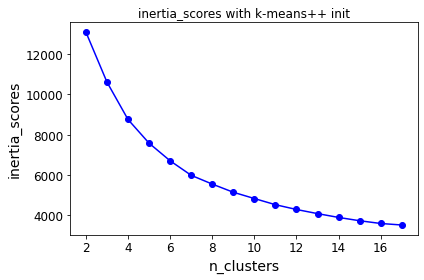

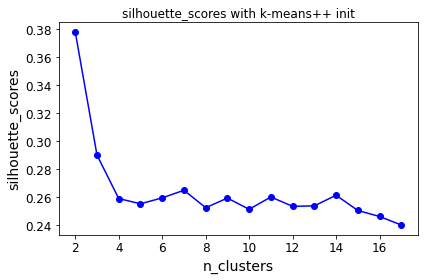

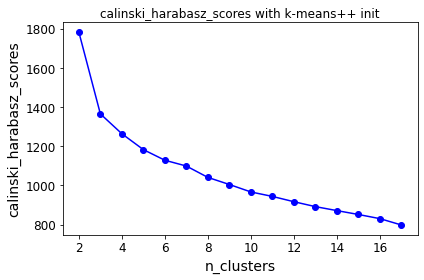

In [25]:
plot_scores('k-means++', 18, data, labels)

Saving figure inertia with random
Saving figure silhouette with random
Saving figure calinski_harabasz with random


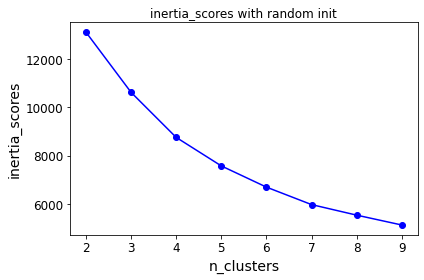

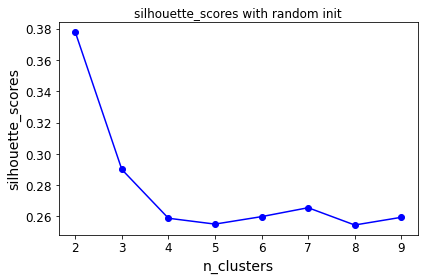

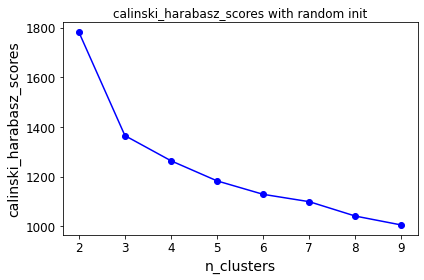

In [26]:
plot_scores('random', 10, data, labels)

In [27]:
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter

def plot_silhouette_diagram(clusterer, X, show_xlabels=True,
                            show_ylabels=True, show_title=True):
    """
    画轮廓图表
    
    :param clusterer: 训练好的聚类模型（这里是能提前设置簇数量的，可以稍微修改代码换成不能提前设置的）
    :param X: 只含特征的数据集
    :param show_xlabels: 为真，添加横坐标信息
    :param show_ylabels: 为真，添加纵坐标信息
    :param show_title: 为真，添加图表名
    """
    
    y_pred = clusterer.labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)
    silhouette_average = silhouette_score(X, y_pred)
    
    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(clusterer.n_clusters):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        
        color = mpl.cm.Spectral(i / clusterer.n_clusters)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
    
    plt.axvline(x=silhouette_average, color="red", linestyle="--")
    
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(clusterer.n_clusters)))
    
    if show_xlabels:
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("Cluster")
    if show_title:
        plt.title("init:{}  n_cluster:{}".format(clusterer.init, clusterer.n_clusters))

Saving figure silhouette_diagram


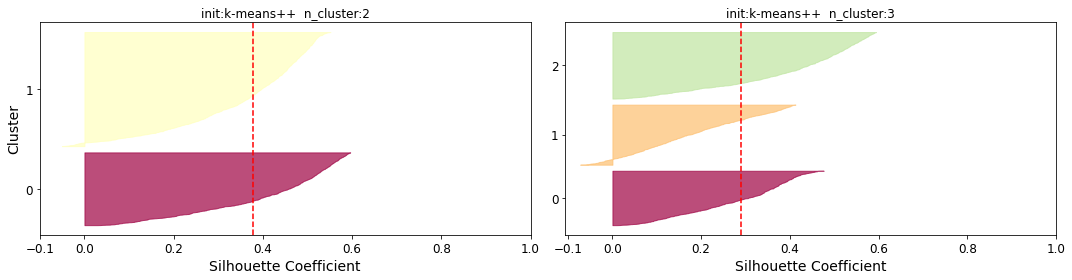

In [28]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
plot_silhouette_diagram(km1, data)
plt.subplot(122)
plot_silhouette_diagram(km3, data, show_ylabels=False)
save_fig("silhouette_diagram")

# MiniBatch KMeans

In [29]:
from sklearn.cluster import MiniBatchKMeans

In [30]:
# 测试KMeans算法运行速度
%timeit KMeans(n_clusters=3).fit(data)

76.8 ms ± 3.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
# 测试MiniBatchKMeans算法运行速度
%timeit MiniBatchKMeans(n_clusters=5).fit(data)

19.2 ms ± 753 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
from timeit import timeit

times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r Training: {}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans.fit(data)", number=10, globals=globals())
    times[k-1, 1] = timeit("minibatch_kmeans.fit(data)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

 Training: 100/100

Saving figure minibatch_kmeans_vs_kmeans


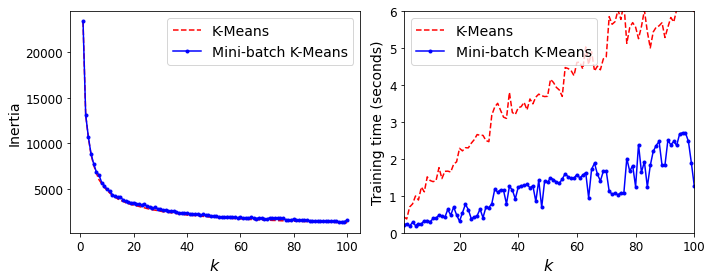

In [33]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.ylabel("Inertia", fontsize=14)
plt.legend(fontsize=14)

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.ylabel("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])
plt.legend(fontsize=14)

save_fig("minibatch_kmeans_vs_kmeans")
plt.show()

# 降维后聚类

In [34]:
from sklearn.decomposition import PCA

# 使用普通PCA进行降维，将特征从11维降至3维
pca1 = PCA(n_components=n_labels)
reduced_data1 = pca1.fit(data)

km4 = KMeans(init='k-means++', n_clusters=n_labels, n_init=10)
get_marks(km4, data, name="PCA-based KMeans", kmeans=True)

******************** PCA-based KMeans ********************
Mean Inertia Score:  10617.459623678296
Homogeneity Score:  0.04517523511343203
Completeness Score:  0.03618016915891193
V Measure Score:  0.04018043208847294
Adjusted Rand Score:  0.04635544048189519
Adjusted Mutual Info Score:  0.03932134070144103
Calinski Harabasz Score:  1364.7220003339555
Silhouette Score:  0.2898868570766755


In [35]:
# 查看训练集的维度，已降至3个维度
len(pca1.components_)

3

In [37]:
# 使用普通PCA降维，将特征降至2维，作二维平面可视化
pca2 = PCA(n_components=2)
reduced_data2 = pca2.fit_transform(data)
# 使用k-means进行聚类，设置簇=3，初始化方法为'k-means++'
kmeans1 = KMeans(init="k-means++", n_clusters=3, n_init=3)
kmeans2 = KMeans(init="random", n_clusters=3, n_init=3)
kmeans1.fit(reduced_data2)
kmeans2.fit(reduced_data2)

KMeans(init='random', n_clusters=3, n_init=3)

In [38]:
# 训练集的特征维度降至2维
len(pca2.components_)

2

In [40]:
# 2维的特征值（降维后）
reduced_data2

array([[ 4.45153748, -0.03328737],
       [-1.54165779, -0.33800428],
       [ 5.49714982, -0.03788792],
       ...,
       [-2.83761386,  1.57425341],
       [-3.10326034,  0.81236796],
       [-4.07764588,  2.46228071]])

In [41]:
# 3个簇中心的坐标
kmeans1.cluster_centers_

array([[-1.25897064, -1.17740702],
       [ 2.79398893,  0.07651978],
       [-2.03342365,  1.35835024]])

In [45]:
from matplotlib.colors import ListedColormap

def plot_data(X, real_tag=None):
    """
    画散点图
    
    :param X: 只含特征值的数据集 
    :param real_tag: 有值，则给含有不同分类的散点上色
    """
    try:
        if not real_tag:
            plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    except ValueError:
        types = list(np.unique(real_tag))
        for i in range(len(types)):
            plt.plot(X[:, 0][real_tag==types[i]], X[:, 1][real_tag==types[i]],
                     '.', label="{}".format(types[i]), markersize=3)
            plt.legend()

def plot_centroids(centroids, circle_color='w', cross_color='k'):
    """
    画出簇中心
    
    :param centroids: 簇中心坐标
    :param circle_color: 圆圈的颜色
    :param cross_color: 叉的颜色
    """
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, zorder=10, linewidths=8,
                color=circle_color, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, zorder=11, linewidths=3,
                color=cross_color, alpha=1)

def plot_centroids_labels(clusterer):
    labels = np.unique(clusterer.labels_)
    centroids = clusterer.cluster_centers_
    for i in range(centroids.shape[0]):
        t = str(labels[i])
        plt.text(centroids[i, 0]-1, centroids[i, 1]-1, t, fontsize=25,
                 zorder=10, bbox=dict(boxstyle='round', fc='yellow', alpha=0.5))
    
def plot_decision_boundaried(clusterer, X, tag=None, resolution=1000, 
                             show_centroids=True, show_xlabels=True,
                             show_ylabels=True, show_title=True,
                             show_centroids_labels=False):
    """
    画出决策边界，并填色
    
    :param clusterer: 训练好的聚类模型（能提前设置簇中心数量或不能提前设置都可以）
    :param X: 只含特征值的数据集
    :param tag: 只含真实分类信息的数据集，有值，则给散点上色
    :param resolution: 类似图片分辨率，给最小的单位上色
    :param show_centroids: 为真，画出簇中心
    :param show_centroids_labels: 为真，标注出该簇中心的标签
    """
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 可用color code或者color自定义填充颜色
    # custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
    plt.contourf(xx, yy, Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                 cmap="Pastel2")
    plt.contour(xx, yy, Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                 colors='k')
    
    try:
        if not tag:
            plot_data(X)
    except ValueError:
        plot_data(X, real_tag=tag)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    if show_centroids_labels:
        plot_centroids_labels(clusterer)
    if show_xlabels:
        plt.xlabel(r"$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel(r"$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    if show_title:
        plt.title("init:{}  n_cluster:{}".format(clusterer.init, clusterer.n_clusters))

Saving figure real_tag_vs_non


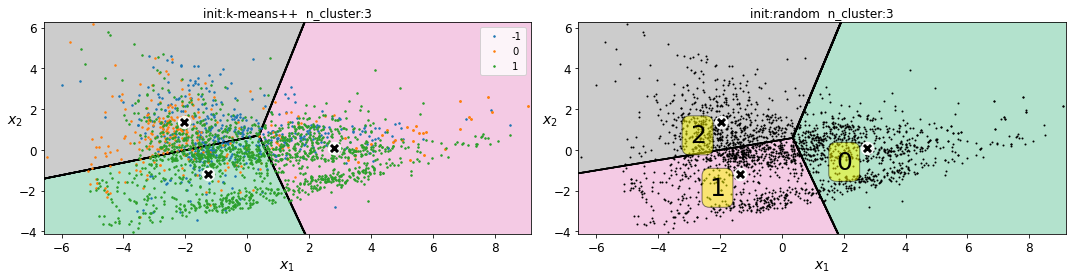

In [46]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
plot_decision_boundaried(kmeans1, reduced_data2, tag=labels)
plt.subplot(122)
plot_decision_boundaried(kmeans2, reduced_data2, show_centroids_labels=True)
save_fig("real_tag_vs_non")
plt.show()

In [47]:
kmeans3 = KMeans(init="k-means++", n_clusters=3, n_init=3)
kmeans4 = KMeans(init="k-means++", n_clusters=4, n_init=3)
kmeans5 = KMeans(init="k-means++", n_clusters=5, n_init=3)
kmeans6 = KMeans(init="k-means++", n_clusters=6, n_init=3)

kmeans3.fit(reduced_data2)
kmeans4.fit(reduced_data2)
kmeans5.fit(reduced_data2)
kmeans6.fit(reduced_data2)

KMeans(n_clusters=6, n_init=3)

Saving figure reduced_and_cluster


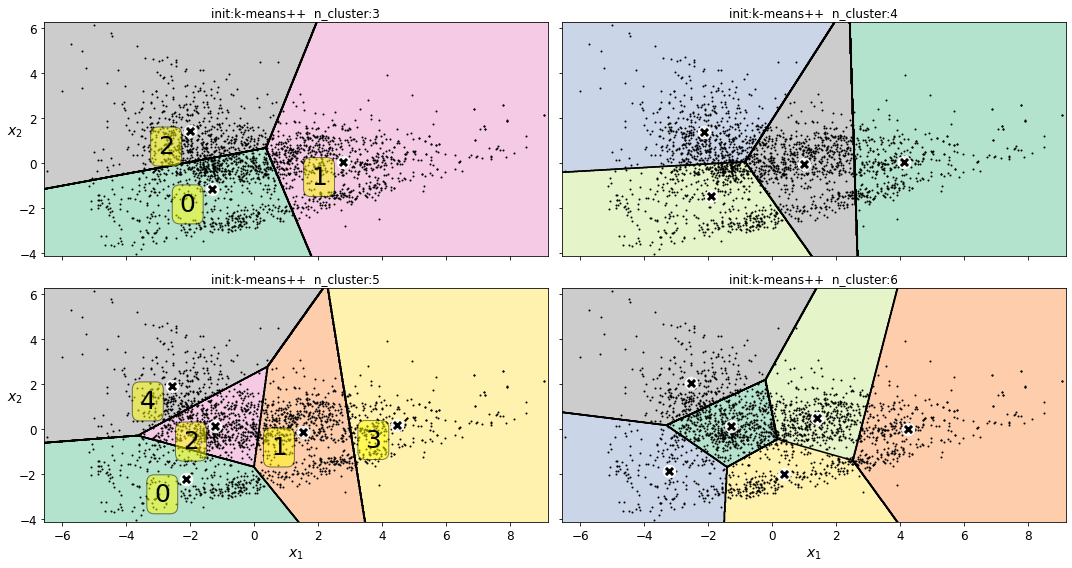

In [48]:
plt.figure(figsize=(15, 8))
plt.subplot(221)
plot_decision_boundaried(kmeans3, reduced_data2, show_xlabels=False, show_centroids_labels=True)
plt.subplot(222)
plot_decision_boundaried(kmeans4, reduced_data2, show_ylabels=False, show_xlabels=False)
plt.subplot(223)
plot_decision_boundaried(kmeans5, reduced_data2, show_centroids_labels=True)
plt.subplot(224)
plot_decision_boundaried(kmeans6, reduced_data2, show_ylabels=False)
save_fig("reduced_and_cluster")
plt.show()

# AP算法聚类

In [49]:
from sklearn.cluster import AffinityPropagation

# 使用AP聚类算法
af = AffinityPropagation(preference=-500, damping=0.8)
af.fit(data)

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


AffinityPropagation(damping=0.8, preference=-500)

In [50]:
# 获取簇的坐标
cluster_centers_indices = af.cluster_centers_indices_
cluster_centers_indices

array([ 415,  877,  978, 1430, 1446, 1609, 1890, 2246])

In [51]:
# 获取分类的类别数量
af_labels = af.labels_
np.unique(af_labels)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [54]:
get_marks(af, data=data, af=True, name="Affinity Propagation")

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


******************** Affinity Propagation ********************
The estimated number of clusters:  8
Homogeneity Score:  0.12856452303045612
Completeness Score:  0.05715983518747723
V Measure Score:  0.07913584430055559
Adjusted Rand Score:  0.030229435212232002
Adjusted Mutual Info Score:  0.07713010981202491
Calinski Harabasz Score:  991.5024239771674
Silhouette Score:  0.23779642413811647


In [91]:
# 将AP聚类聚类的结果写入原始表格中
df['ap_clustering_label'] = af.labels_
# 以csv形式导出原始表格
df.to_csv('data_after_clustering.csv')

In [56]:
# 最后两列为两种聚类算法的分类信息
df.head()

,TRUE VALUE,SiO2 (wt. %),TiO2 (wt. %),Al2O3 (wt. %),Cr2O3 (wt. %),FeO (wt. %),MnO (wt. %),MgO (wt. %),CaO (wt. %),Na2O (wt. %),IV (Al),H2O (wt. %),km_clustering_label,ap_clustering_label
0,1,47.604,2.858,5.749,0.062,7.024,0.087,12.625,22.916,0.328,0.207900,0.061750,0,7
1,1,51.788,1.166,2.557,0.475,6.801,0.145,14.762,21.743,0.327,0.080071,0.014881,1,6
2,1,46.561,3.109,6.139,0.145,6.914,0.037,12.478,23.112,0.620,0.238984,0.023204,0,7
3,1,46.344,3.170,7.776,0.014,6.842,0.068,11.688,23.067,0.574,0.258931,0.049703,0,7
4,1,50.180,1.965,3.294,0.106,5.729,0.063,13.603,23.626,0.540,0.121500,0.019333,0,0


In [57]:
from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RamdomizedSearchCV

# 使用GridSearchCV自动寻找最优参数，如果时间太久(约4.7min)，可以使用随机搜索，这里是用AP做分类的工作
params = {'preference':[-50, -100, -150, -200], 'damping':[0.5, 0.6, 0.7, 0.8, 0.9]}
cluster = AffinityPropagation()
af_best_model = GridSearchCV(cluster, params, cv=5, scoring='adjusted_rand_score', verbose=1, n_jobs=-1)
af_best_model.fit(data, labels)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.7min finished
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


GridSearchCV(cv=5, estimator=AffinityPropagation(), n_jobs=-1,
             param_grid={'damping': [0.5, 0.6, 0.7, 0.8, 0.9],
                         'preference': [-50, -100, -150, -200]},
             scoring='adjusted_rand_score', verbose=1)

In [58]:
# 最优模型的参数设置
af_best_model.best_params_

{'damping': 0.7, 'preference': -200}

In [59]:
# 最优模型的评分，使用调整的兰德系数(adjusted_rand_score)作为评分
af_best_model.best_score_

0.026580921222201737

In [60]:
# 获取最优模型
af1 = af_best_model.best_estimator_
af1

AffinityPropagation(damping=0.7, preference=-200)

In [61]:
# 最优模型的评分
get_marks(af1, data=data, af=True, name="Affinity Propagation")

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


******************** Affinity Propagation ********************
The estimated number of clusters:  15
Homogeneity Score:  0.2429519620051099
Completeness Score:  0.08101355849560997
V Measure Score:  0.1215092455215798
Adjusted Rand Score:  0.028992799939499304
Adjusted Mutual Info Score:  0.11838311178280127
Calinski Harabasz Score:  807.4918320113964
Silhouette Score:  0.22767258566642778


In [62]:
"""
from sklearn.externals import joblib

# 保存以pkl格式最优模型
joblib.dump(af1, "af1.pkl")
"""

'\nfrom sklearn.externals import joblib\n\n# 保存以pkl格式最优模型\njoblib.dump(af1, "af1.pkl")\n'

In [63]:
"""
# 从pkl格式中导出最优模型
my_model_loaded = joblib.load("af1.pkl")
"""

'\n# 从pkl格式中导出最优模型\nmy_model_loaded = joblib.load("af1.pkl")\n'

In [64]:
"""
my_model_loaded
"""

'\nmy_model_loaded\n'

In [65]:
from sklearn.decomposition import PCA

# 使用普通PCA进行降维，将特征从11维降至3维
pca3 = PCA(n_components=n_labels)
reduced_data3 = pca3.fit_transform(data)

af2 = AffinityPropagation(preference=-200, damping=0.8)
get_marks(af2, reduced_data3, name="PCA-based AF", af=True)

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


******************** PCA-based AF ********************
The estimated number of clusters:  14
Homogeneity Score:  0.23228105088102896
Completeness Score:  0.08046260497248087
V Measure Score:  0.11952241453868143
Adjusted Rand Score:  0.026689336886429438
Adjusted Mutual Info Score:  0.11652981943536499
Calinski Harabasz Score:  1092.8504706237088
Silhouette Score:  0.2810791026425721


# 基于聚类结果的分层抽样

In [66]:
# data2是去掉真实分类信息的数据集（含有聚类后的结果）
data2 = df.drop("TRUE VALUE", axis=1)
data2.head()

,SiO2 (wt. %),TiO2 (wt. %),Al2O3 (wt. %),Cr2O3 (wt. %),FeO (wt. %),MnO (wt. %),MgO (wt. %),CaO (wt. %),Na2O (wt. %),IV (Al),H2O (wt. %),km_clustering_label,ap_clustering_label
0,47.604,2.858,5.749,0.062,7.024,0.087,12.625,22.916,0.328,0.207900,0.061750,0,7
1,51.788,1.166,2.557,0.475,6.801,0.145,14.762,21.743,0.327,0.080071,0.014881,1,6
2,46.561,3.109,6.139,0.145,6.914,0.037,12.478,23.112,0.620,0.238984,0.023204,0,7
3,46.344,3.170,7.776,0.014,6.842,0.068,11.688,23.067,0.574,0.258931,0.049703,0,7
4,50.180,1.965,3.294,0.106,5.729,0.063,13.603,23.626,0.540,0.121500,0.019333,0,0


<AxesSubplot:>

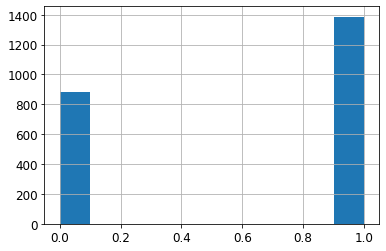

In [67]:
# 查看使用kmeans聚类后的分类标签值，两类
data2['km_clustering_label'].hist()

In [68]:
from sklearn.model_selection import StratifiedShuffleSplit

# 基于kmeans聚类结果的分层抽样
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data2, data2["km_clustering_label"]):
    strat_train_set = data2.loc[train_index]
    strat_test_set = data2.loc[test_index]

In [69]:
def clustering_result_propotions(data):
    """
    分层抽样后，训练集或测试集里不同分类标签的数量比
    :param data: 训练集或测试集，纯随机取样或分层取样
    """
    return data["km_clustering_label"].value_counts() / len(data)

In [70]:
# 经过分层抽样的测试集中，不同分类标签的数量比
clustering_result_propotions(strat_test_set)

1    0.610989
0    0.389011
Name: km_clustering_label, dtype: float64

In [71]:
# 经过分层抽样的训练集中，不同分类标签的数量比
clustering_result_propotions(strat_train_set)

1    0.610347
0    0.389653
Name: km_clustering_label, dtype: float64

In [72]:
# 完整的数据集中，不同分类标签的数量比
clustering_result_propotions(data2)

1    0.610475
0    0.389525
Name: km_clustering_label, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split

# 纯随机取样
random_train_set, random_test_set = train_test_split(data2, test_size=0.2, random_state=42)

# 完整的数据集、分层抽样后的测试集、纯随机抽样后的测试集中，不同分类标签的数量比
compare_props = pd.DataFrame({
    "Overall": clustering_result_propotions(data2),
    "Stratified": clustering_result_propotions(strat_test_set),
    "Random": clustering_result_propotions(random_test_set),
}).sort_index()

# 计算分层抽样和纯随机抽样后的测试集中不同分类标签的数量比，和完整的数据集中不同分类标签的数量比的误差
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Start. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Start. %error
0,0.389525,0.389011,0.382418,-1.824548,-0.131868
1,0.610475,0.610989,0.617582,1.164185,0.084141


In [75]:
from sklearn.metrics import f1_score

def get_classification_marks(model, data, labels, train_index, test_index):
    """
    获取分类模型（二元或多元分类器）的评分：F1值
    :param data: 只含有特征值的数据集
    :param labels: 只含有标签值的数据集
    :param train_index: 分层抽样获取的训练集中数据的索引
    :param test_index: 分层抽样获取的测试集中数据的索引
    :return: F1评分值
    """
    m = model(random_state=42)
    m.fit(data.loc[train_index], labels.loc[train_index])
    test_labels_predict = m.predict(data.loc[test_index])
    score = f1_score(labels.loc[test_index], test_labels_predict, average="weighted")
    return score

In [76]:
from sklearn.linear_model import LogisticRegression

# 用分层抽样后的训练集训练分类模型后的评分值
start_marks = get_classification_marks(LogisticRegression, data, labels, strat_train_set.index, strat_test_set.index)
start_marks

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7023519573999487

In [77]:
# 用纯随机抽样后的训练集训练分类模型后的评分值
random_marks = get_classification_marks(LogisticRegression, data, labels, random_train_set.index, random_test_set.index)
random_marks

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6994465046063435

In [81]:
import numpy as np
from sklearn.metrics import f1_score, r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone, BaseEstimator, TransformerMixin

class stratified_cross_val_score(BaseEstimator, TransformerMixin):
    """实现基于分层抽样的k折交叉验证"""
    
    def __init__(self, model, random_state=0, cv=5, pattern="classification"):
        """
        :model: 训练的模型（回归或分类）
        :random_state: 模型的随机种子值
        :cv: 交叉验证的次数
        :pattern: classification和regression两种选择
        """
        self.model = model
        self.random_state = random_state
        self.cv = cv
        self.pattern = pattern
        self.scores_ = []  
        self.best_score_ = []
        self.estimators_ = []
        self.best_estimator_ = []
        
        self.i = 0            
    
    def fit(self, X, y, layer_tag):
        """
        :param X: 只含有特征值的完整数据集
        :param y: 只含有标签值的完整数据集
        :param tag: 只含有分层依据的完整数据集（此例是KMeans聚类结果）
        
        """
        skfolds = StratifiedKFold(n_splits=self.cv, random_state=self.random_state)

        for train_index, test_index in skfolds.split(X, layer_tag):
            # 复制要训练的模型（分类或回归）
            clone_model = clone(self.model)
            strat_X_train_folds, strat_X_test_fold = X.iloc[train_index], X.iloc[test_index]
            strat_y_train_folds, strat_y_test_fold = y.iloc[train_index], y.iloc[test_index]
            
            # 训练模型
            clone_model.fit(strat_X_train_folds, strat_y_train_folds)
            # 保留模型
            self.estimators_.append(clone_model)
            # 预测值（这里是分类模型的分类结果）
            test_labels_pred = clone_model.predict(strat_X_test_fold)
            
            if self.pattern == "classification":
                # 分类模型用F1值
                score_fold = f1_score(y.iloc[test_index], test_labels_pred, average="weighted")
            elif self.pattern == "regression":
                # 回归模型使用r2值
                score_fold = r2_score(y.iloc[test_index], test_labels_pred)
            
            # 避免重复向列表里重复添加值
            if self.i < self.cv:
                self.scores_.append(score_fold)
            else:
                None
                
            self.i += 1
        
        # 获取评分最高模型的索引
        argmax  = np.argmax(self.scores_)
        self.best_score_ = self.scores_[argmax]
        self.best_estimator_ = self.estimators_[argmax]
        
    def transform(self, X, y=None):
        return self
    
    def mean(self):
        """返回交叉验证评分的平均值"""
        return np.array(self.scores_).mean()
    
    def std(self):
        """返回交叉验证评分的标准差"""
        return np.array(self.scores_).std()

In [84]:
from sklearn.linear_model import SGDClassifier

# 分类模型
clf_model = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
# 基于分层抽样的交叉验证，data是只含特征值的完整数据集，labels是只含标签值的完整数据集
clf_cross_val = stratified_cross_val_score(clf_model, cv=5, random_state=42, pattern="classification")
clf_cross_val_score = clf_cross_val.fit(data, labels, df['km_clustering_label'])

/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [85]:
# 每折交叉验证的评分
clf_cross_val.scores_

[0.751211138417513,
 0.650680734508983,
 0.7102382963182763,
 0.6037692838132797,
 0.09961861335790541]

In [86]:
# 五折交叉验证中最好的评分
clf_cross_val.best_score_

0.751211138417513

In [87]:
# 交叉验证评分的平均值
clf_cross_val.mean()

0.5631036132831915

In [88]:
# 交叉验证评分的标准差
clf_cross_val.std()

0.23713913639110495

In [89]:
# 五折交叉验证的所有模型
clf_cross_val.estimators_

[SGDClassifier(max_iter=5, random_state=42, tol=-inf),
 SGDClassifier(max_iter=5, random_state=42, tol=-inf),
 SGDClassifier(max_iter=5, random_state=42, tol=-inf),
 SGDClassifier(max_iter=5, random_state=42, tol=-inf),
 SGDClassifier(max_iter=5, random_state=42, tol=-inf)]

In [90]:
# 五折交叉验证中的最优模型
best_model = clf_cross_val.best_estimator_